In [98]:
from imutils import paths
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import cv2

# Using Aff-wild2 as core

# Before Up and Down-Sampling

In [2]:
images_path = list(paths.list_images('Affwild2'))
len(images_path)

335460

In [3]:
anger_path=list(paths.list_images('Affwild2/aff_train/1'))
disgust_path=list(paths.list_images('Affwild2/aff_train/2'))
fear_path=list(paths.list_images('Affwild2/aff_train/3'))
happiness_path=list(paths.list_images('Affwild2/aff_train/4'))
sadness_path=list(paths.list_images('Affwild2/aff_train/5'))
surprise_path=list(paths.list_images('Affwild2/aff_train/6'))

anger_val_path=list(paths.list_images('Affwild2/aff_val/1'))
disgust_val_path=list(paths.list_images('Affwild2/aff_val/2'))
fear_val_path=list(paths.list_images('Affwild2/aff_val/3'))
happiness_val_path=list(paths.list_images('Affwild2/aff_val/4'))
sadness_val_path=list(paths.list_images('Affwild2/aff_val/5'))
surprise_val_path=list(paths.list_images('Affwild2/aff_val/6'))

In [4]:
len(surprise_path)

31911

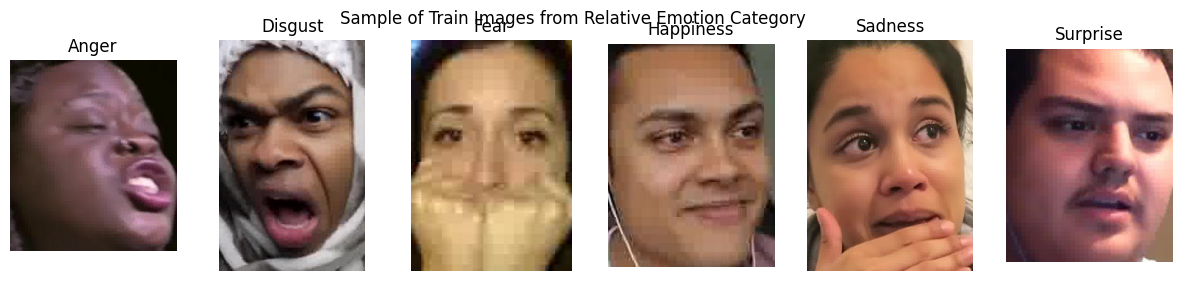

In [5]:
sample = [anger_path[2], disgust_path[12], fear_path[33], happiness_path[2], sadness_path[2], surprise_path[281]]
categories = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']
fig, axs = plt.subplots(1, 6, figsize=(15, 3))

for i, image_path in enumerate(sample):
    img = Image.open(image_path)
    axs[i].imshow(img,cmap='gray') #adjust imshow colormap to map colors back to original grayscaled images, will be greenish images without this 
    axs[i].axis('off')
    axs[i].set_title(categories[i])

plt.suptitle('Sample of Train Images from Relative Emotion Category')

plt.show()

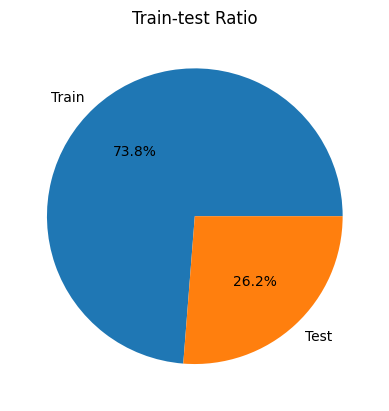

In [6]:
train_set_paths=list(paths.list_images('Affwild2/aff_train/'))
val_set_paths=list(paths.list_images('Affwild2/aff_val/'))
ratio = [len(train_set_paths),len(val_set_paths)]
labels = ['Train','Test']

plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.title('Train-test Ratio')
plt.show()

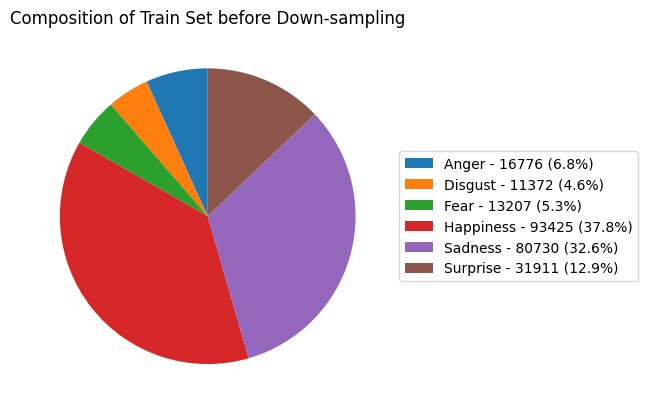

In [7]:
ratio = [len(anger_path), len(disgust_path),len(fear_path), len(happiness_path), len(sadness_path), len(surprise_path)]
labels = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']        
total_samples = sum(ratio)
#calculate the percentages and create the legend labels
legend_labels = [f'{label} - {count} ({count/total_samples*100:.1f}%)' for label, count in zip(labels, ratio)]
patches, texts = plt.pie(ratio, startangle=90)
plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.title('Composition of Train Set before Down-sampling')
plt.show()

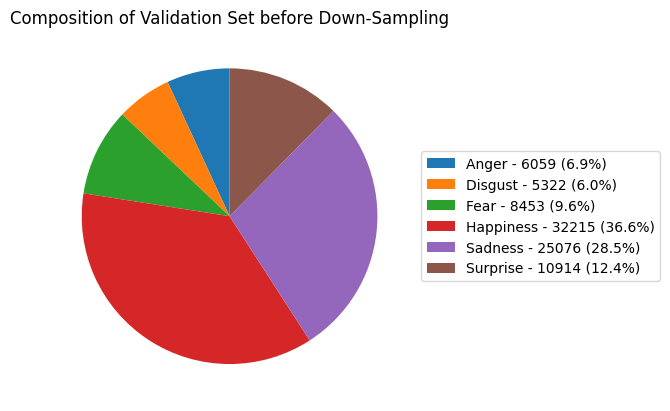

In [8]:
ratio = [len(anger_val_path), len(disgust_val_path),len(fear_val_path), len(happiness_val_path), len(sadness_val_path), len(surprise_val_path)]
labels = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']        
total_samples = sum(ratio)
#calculate the percentages and create the legend labels
legend_labels = [f'{label} - {count} ({count/total_samples*100:.1f}%)' for label, count in zip(labels, ratio)]
patches, texts = plt.pie(ratio, startangle=90)
plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.title('Composition of Validation Set before Down-Sampling')
plt.show()

# Up and Down-Sampling

In [99]:
import os
import random
import shutil

In [8]:
#calculations of appropriate ratio of samples 
#downsample to total 120,000 images from 330,927 images 
#number of samples in train and validation set 
train_total = 120000 * 0.734 
val_total = 120000 * 0.266 

#number of samples in each category for respective subsets 
train_cat_total = int(train_total/6)
val_cat_total = int(val_total/6)

In [107]:
#random down sampling
def downsampling(source_dir,destination_dir, desired_images_per_category): 
    
    #create folder if doesn't exist
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)
    else:
        print('Down-sampled dataset exist!') 
        return
        
    #create folder for each category
    categories = os.listdir(source_dir)
    
    for category in categories:
        category_dir = os.path.join(source_dir, category)
        if os.path.isdir(category_dir):
            category_images = [f for f in os.listdir(category_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
            #randomly selects fix amount number of samples
            if len(category_images) > desired_images_per_category:
                selected_images = random.sample(category_images, desired_images_per_category)
            else:
                selected_images = category_images
            
            destination_category_dir = os.path.join(destination_dir, category)
            os.makedirs(destination_category_dir, exist_ok=True)
            
            for image in selected_images:
                source_image_path = os.path.join(category_dir, image)
                destination_image_path = os.path.join(destination_category_dir, image)
                
                shutil.copy2(source_image_path, destination_image_path)
    print('Down-sampling complete in ', destination_dir) 

In [12]:
downsampling('Affwild2/aff_train/','DownAff/aff_train', train_cat_total) 
downsampling('Affwild2/aff_val/','DownAff/aff_val', val_cat_total) 

Down-sampled dataset exist!
Down-sampled dataset exist!


In [9]:
up_disgust = train_cat_total - len(disgust_path) 
up_fear = train_cat_total - len(fear_path)

In [22]:
up_disgust

3744

In [25]:
category_dir = 'FER/train/disgust'
os.listdir(category_dir)

['Training_61263973.jpg',
 'Training_92118201.jpg',
 'Training_61291772.jpg',
 'Training_97741852.jpg',
 'Training_93159835.jpg',
 'Training_97690817.jpg',
 'Training_93510905.jpg',
 'Training_8937293.jpg',
 'Training_92872071.jpg',
 'Training_89374221.jpg',
 'Training_92542568.jpg',
 'Training_89701855.jpg',
 'Training_92587210.jpg',
 'Training_89094363.jpg',
 'Training_59111726.jpg',
 'Training_92867053.jpg',
 'Training_70479209.jpg',
 'Training_680349.jpg',
 'Training_61376133.jpg',
 'Training_14528146.jpg',
 'Training_93689671.jpg',
 'Training_61342142.jpg',
 'Training_98010375.jpg',
 'Training_92886088.jpg',
 'Training_74423618.jpg',
 'Training_18375779.jpg',
 'Training_60245347.jpg',
 'Training_91485821.jpg',
 'Training_49158638.jpg',
 'Training_7602986.jpg',
 'Training_12896398.jpg',
 'Training_85400968.jpg',
 'Training_62572176.jpg',
 'Training_79594467.jpg',
 'Training_99044827.jpg',
 'Training_73744534.jpg',
 'Training_69984239.jpg',
 'Training_95344687.jpg',
 'Training_18584

In [108]:
def upsampling(source_dir,destination_dir, desired_images_per_category):    
    category_dir = source_dir 
    if os.path.isdir(source_dir):
        add_images = os.listdir(category_dir)
        if len(add_images) <= desired_images_per_category: 
            selected_images = random.sample(add_images, len(add_images))
        elif len(add_images) > desired_images_per_category:  
            selected_images = random.sample(add_images, desired_images_per_category)
    for image in selected_images:
        source_image_path = os.path.join(category_dir, image)
        destination_image_path = os.path.join(destination_dir, image)
        shutil.copy2(source_image_path, destination_image_path)

    print('Up-sampling complete images in ', destination_dir) 

In [20]:
upsampling('FER/train/fear', 'Affwild2/aff_train/3', up_fear) 
upsampling('FER/train/disgust', 'Affwild2/aff_train/2', up_disgust) 

Up-sampling complete with  5570  images in  Affwild2/aff_train/3
Up-sampling complete with  3744  images in  Affwild2/aff_train/2


In [21]:
down_disgust_path=list(paths.list_images('DownAff/aff_train/2'))
down_fear_path=list(paths.list_images('DownAff/aff_train/3'))
up_disgust2 = train_cat_total - len(down_disgust_path) 
up_fear2 = train_cat_total - len(down_fear_path)

In [22]:
up_disgust2, up_fear2

(3744, 5570)

# After Up and Down-Sampling

In [10]:
down_anger_path=list(paths.list_images('DownAff/aff_train/1'))
down_disgust_path=list(paths.list_images('DownAff/aff_train/2'))
down_fear_path=list(paths.list_images('DownAff/aff_train/3'))
down_happiness_path=list(paths.list_images('DownAff/aff_train/4'))
down_sadness_path=list(paths.list_images('DownAff/aff_train/5'))
down_surprise_path=list(paths.list_images('DownAff/aff_train/6'))


down_anger_val_path=list(paths.list_images('DownAff/aff_val/1'))
down_disgust_val_path=list(paths.list_images('DownAff/aff_val/2'))
down_fear_val_path=list(paths.list_images('DownAff/aff_val/3'))
down_happiness_val_path=list(paths.list_images('DownAff/aff_val/4'))
down_sadness_val_path=list(paths.list_images('DownAff/aff_val/5'))
down_surprise_val_path=list(paths.list_images('DownAff/aff_val/6'))

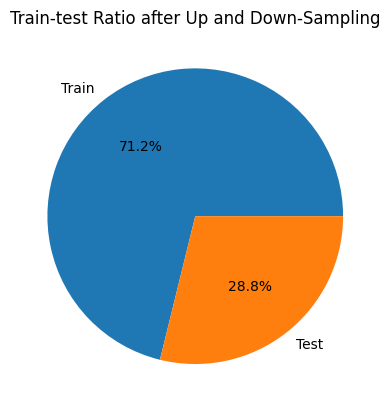

In [12]:
down_train_set_paths=list(paths.list_images('DownAff/aff_train/'))
down_val_set_paths=list(paths.list_images('DownAff/aff_val/'))
ratio = [len(down_train_set_paths),len(down_val_set_paths)]
labels = ['Train','Test']

plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.title('Train-test Ratio after Up and Down-Sampling')
plt.show()

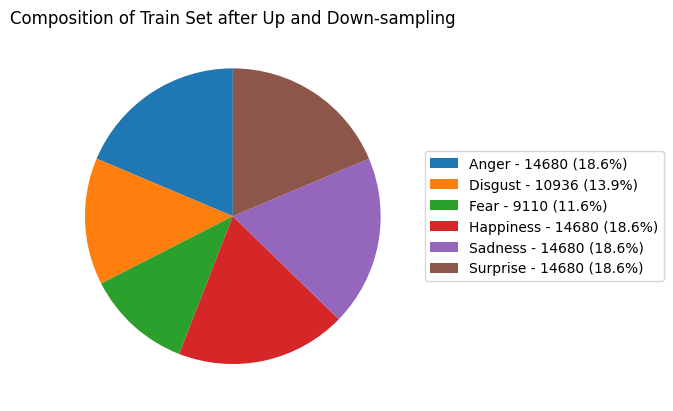

In [13]:
ratio = [len(down_anger_path), len(down_disgust_path),len(down_fear_path), len(down_happiness_path), len(down_sadness_path), len(down_surprise_path)]
labels = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']        
total_samples = sum(ratio)
#calculate the percentages and create the legend labels
legend_labels = [f'{label} - {count} ({count/total_samples*100:.1f}%)' for label, count in zip(labels, ratio)]
patches, texts = plt.pie(ratio, startangle=90)
plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.title('Composition of Train Set after Up and Down-sampling')
plt.show()

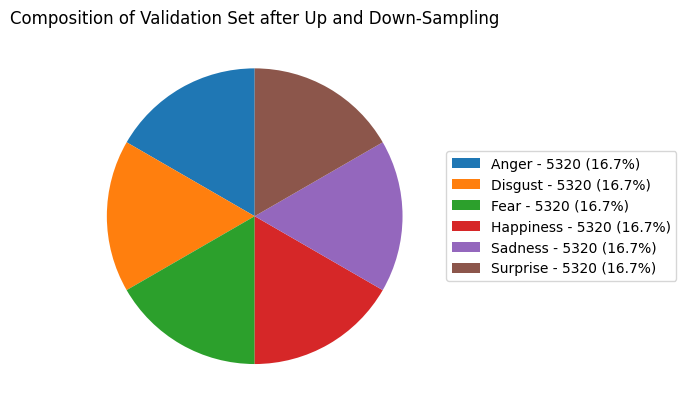

In [14]:
ratio = [len(down_anger_val_path), len(down_disgust_val_path),len(down_fear_val_path), len(down_happiness_val_path), 
         len(down_sadness_val_path), len(down_surprise_val_path)]
labels = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']        
total_samples = sum(ratio)
#calculate the percentages and create the legend labels
legend_labels = [f'{label} - {count} ({count/total_samples*100:.1f}%)' for label, count in zip(labels, ratio)]
patches, texts = plt.pie(ratio, startangle=90)
plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.title('Composition of Validation Set after Up and Down-Sampling')
plt.show()

# Data Augmentation - Flip for Fear and Disgust in Train Set

In [15]:
len(down_disgust_path),len(down_fear_path)

(10936, 9110)

In [17]:
len(down_happiness_path) 

14680

In [18]:
dff_disgust = len(down_happiness_path) - len(down_disgust_path) 
dff_fear = len(down_happiness_path) - len(down_fear_path) 

In [24]:
import os
import random
from PIL import Image, ImageOps

def augment(original_directory, flipped_directory, n):

    # List all image filenames in the original directory
    original_image_files = os.listdir(original_directory)
    
    # Randomly select images
    selected_images = random.sample(original_image_files, n)
    
    # Apply horizontal flip and save the flipped images
    for image_file in selected_images:
        image_path = os.path.join(original_directory, image_file)
        image = Image.open(image_path)
        flipped_image = ImageOps.mirror(image)
        
        flipped_image_filename = "flipped_" + image_file
        flipped_image_path = os.path.join(flipped_directory, flipped_image_filename)
        flipped_image.save(flipped_image_path)
        
        # If you want to keep the original images as well, you can copy them to the flipped directory
        original_image_path = os.path.join(original_directory, image_file)
        new_original_image_path = os.path.join(flipped_directory, flipped_image_filename)
        shutil.copy(original_image_path, new_original_image_path)

In [26]:
augment('Affwild2/aff_train/3', 'DownAff/aff_train/3', dff_fear) 
augment('Affwild2/aff_train/2', 'DownAff/aff_train/2', dff_disgust) 

In [27]:
down_anger_path=list(paths.list_images('DownAff/aff_train/1'))
down_disgust_path=list(paths.list_images('DownAff/aff_train/2'))
down_fear_path=list(paths.list_images('DownAff/aff_train/3'))
down_happiness_path=list(paths.list_images('DownAff/aff_train/4'))
down_sadness_path=list(paths.list_images('DownAff/aff_train/5'))
down_surprise_path=list(paths.list_images('DownAff/aff_train/6'))


down_anger_val_path=list(paths.list_images('DownAff/aff_val/1'))
down_disgust_val_path=list(paths.list_images('DownAff/aff_val/2'))
down_fear_val_path=list(paths.list_images('DownAff/aff_val/3'))
down_happiness_val_path=list(paths.list_images('DownAff/aff_val/4'))
down_sadness_val_path=list(paths.list_images('DownAff/aff_val/5'))
down_surprise_val_path=list(paths.list_images('DownAff/aff_val/6'))

In [28]:
len(down_disgust_path),len(down_fear_path)

(14680, 14680)

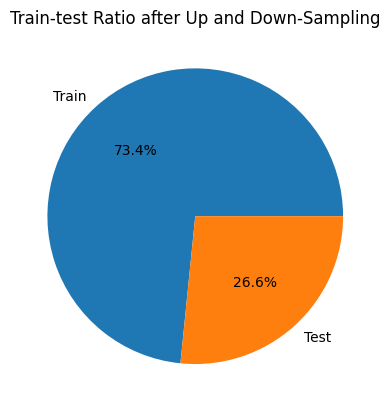

In [29]:
down_train_set_paths=list(paths.list_images('DownAff/aff_train/'))
down_val_set_paths=list(paths.list_images('DownAff/aff_val/'))
ratio = [len(down_train_set_paths),len(down_val_set_paths)]
labels = ['Train','Test']

plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.title('Train-test Ratio after Data Augmentation')
plt.show()

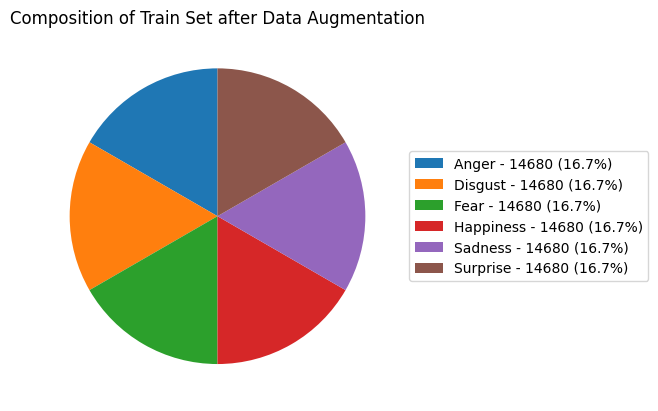

In [32]:
ratio = [len(down_anger_path), len(down_disgust_path),len(down_fear_path), len(down_happiness_path), len(down_sadness_path), len(down_surprise_path)]
labels = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']        
total_samples = sum(ratio)
#calculate the percentages and create the legend labels
legend_labels = [f'{label} - {count} ({count/total_samples*100:.1f}%)' for label, count in zip(labels, ratio)]
patches, texts = plt.pie(ratio, startangle=90)
plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.title('Composition of Train Set after Data Augmentation')
plt.show()

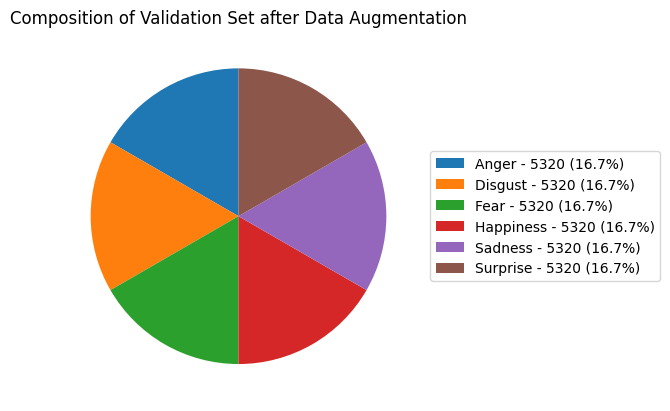

In [33]:
ratio = [len(down_anger_val_path), len(down_disgust_val_path),len(down_fear_val_path), len(down_happiness_val_path), 
         len(down_sadness_val_path), len(down_surprise_val_path)]
labels = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']        
total_samples = sum(ratio)
#calculate the percentages and create the legend labels
legend_labels = [f'{label} - {count} ({count/total_samples*100:.1f}%)' for label, count in zip(labels, ratio)]
patches, texts = plt.pie(ratio, startangle=90)
plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.title('Composition of Validation Set after Data Augmentation')
plt.show()

# Composition of each Database

In [85]:
def plot_pie(directory, database, save_path = None): 
    import os
    categories = os.listdir(directory)
    categories = [folder for folder in categories if folder != '.DS_Store' and not folder.startswith('._')]
    ratio = []
    labels = []
    for i in categories: 
        category_path = os.path.join(directory,i)
        length = os.listdir(category_path) 
        length = [folder for folder in length if folder != '.DS_Store' and not folder.startswith('._')]
        ratio.append(len(length))
        if database == 'CK+': 
            if i == '0': i = 'neutral' 
            elif i == '1': i = 'anger' 
            elif i == '2': i = 'contempt' 
            elif i == '3': i = 'disgust' 
            elif i == '4': i = 'fear' 
            elif i == '5': i = 'happy' 
            elif i == '6': i = 'sadness'
            elif i == '7': i = 'surprise' 
        elif database == 'JAFFE': 
            if i  == '0': i = 'happy' 
            elif i == '1': i = 'sadness' 
            elif i == '2': i = 'surprise' 
            elif i == '3': i = 'anger' 
            elif i == '4': i = 'disgust' 
            elif i == '5': i = 'fear' 
        elif database == 'Aff-wild2': 
            if i == '1': i = 'anger' 
            elif i == '2': i = 'disgust'
            elif i == '3': i = 'fear' 
            elif i == '4': i = 'happy' 
            elif i == '5': i = 'sadness' 
            elif i == '6': i = 'surprise'
                
        labels.append(i) 
    total_samples = sum(ratio)
    legend_labels = [f'{label} - {count} ({count/total_samples*100:.1f}%)' for label, count in zip(labels, ratio)]
    patches, texts = plt.pie(ratio, startangle=90)
    plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1)) 
    plt.title(f'Composition of {database}')


    if save_path:
        plt.savefig(save_path, bbox_inches='tight')  # Save the plot with specified path
    
    plt.show()

In [86]:
ck_path = list(paths.list_images('CK+/extracted'))
len(ck_path)

327

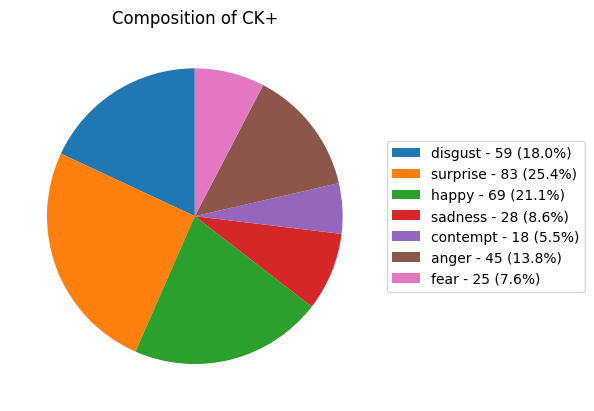

In [87]:
plot_pie('CK+/extracted', 'CK+','composition_pie/ck.png')

In [88]:
jaffe_path = list(paths.list_images('JAFFE/extracted'))
len(jaffe_path)

426

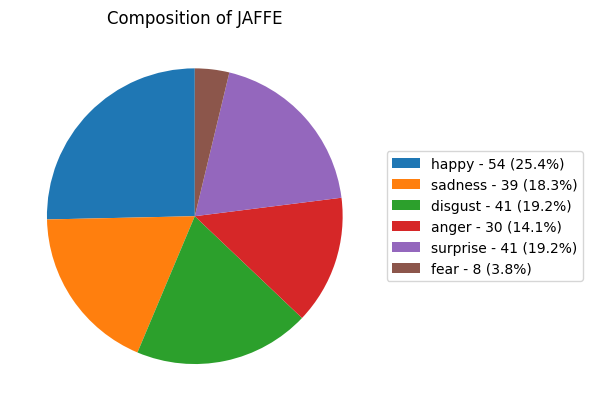

In [89]:
plot_pie('JAFFE/extracted', 'JAFFE','composition_pie/jaffe.png')

In [90]:
fer_path = list(paths.list_images('FER/train'))
len(fer_path)

28709

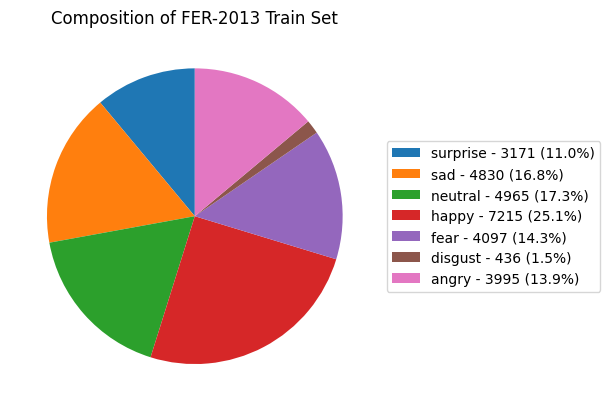

In [91]:
plot_pie('FER/train', 'FER-2013 Train Set','composition_pie/fer.png')

In [92]:
adfes_path = list(paths.list_images('ADFES/extracted'))
len(adfes_path)

228

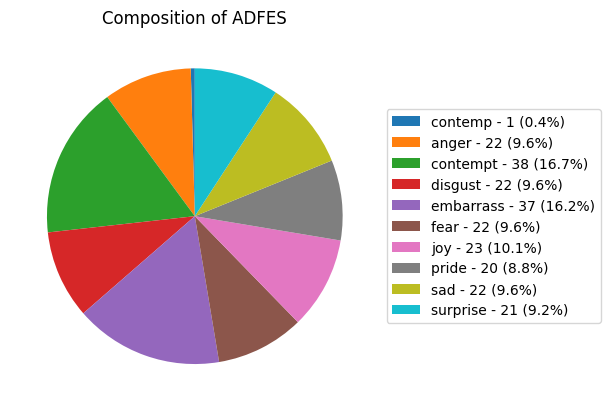

In [93]:
plot_pie('ADFES/extracted', 'ADFES','composition_pie/adfes.png')

In [94]:
images_path = list(paths.list_images('Affwild2'))
len(images_path)

351517

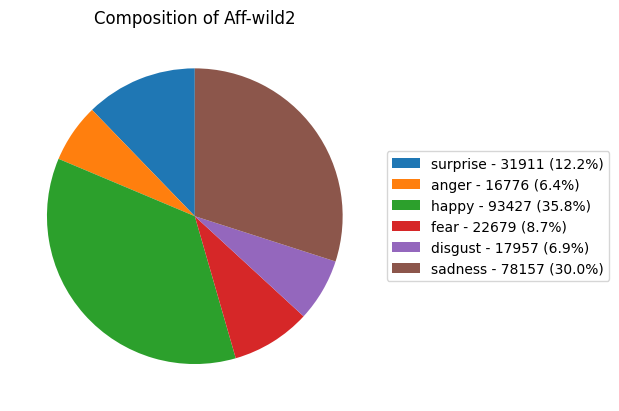

In [95]:
plot_pie('Affwild2/aff_train', 'Aff-wild2','composition_pie/aff_train.png')

# Using FER as core

### Down Sampling

In [116]:
downsampling('FER/train/','DownFER/train', 4500) 

Down-sampling complete in  DownFER/train


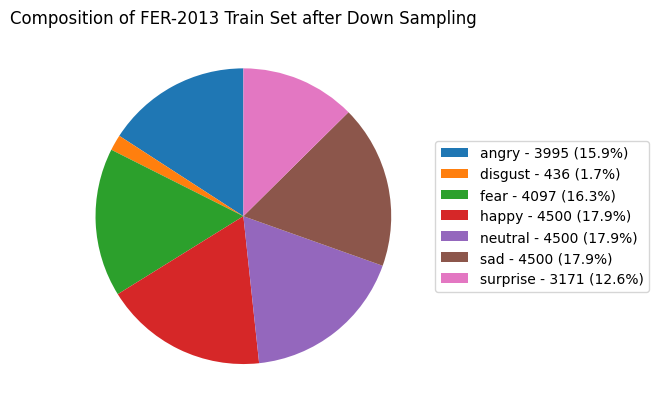

In [117]:
plot_pie('DownFER/train', 'FER-2013 Train Set after Down Sampling')

### Up Sampling Angry  

Up-sampling complete images in  DownFER/train/angry


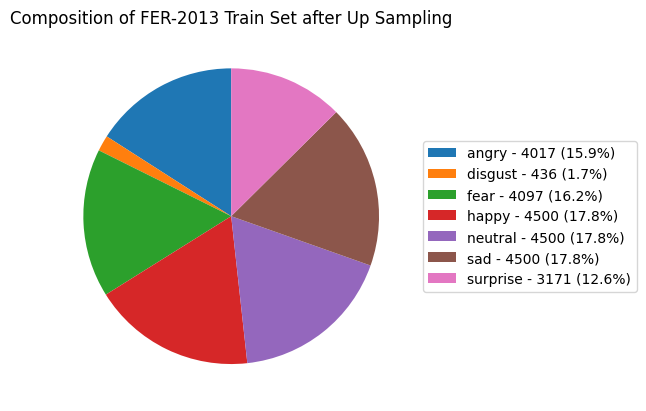

In [118]:
anger = 4500 - 3995
upsampling('ADFES/extracted/anger', 'DownFER/train/angry', anger)
plot_pie('DownFER/train', 'FER-2013 Train Set after Up Sampling')

Up-sampling complete images in  DownFER/train/angry


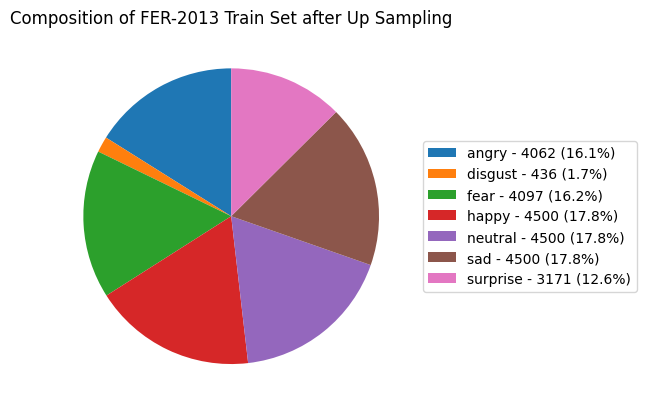

In [119]:
anger = 4500 - 4017
upsampling('CK+/extracted/1', 'DownFER/train/angry', anger)
plot_pie('DownFER/train', 'FER-2013 Train Set after Up Sampling')

Up-sampling complete images in  DownFER/train/angry


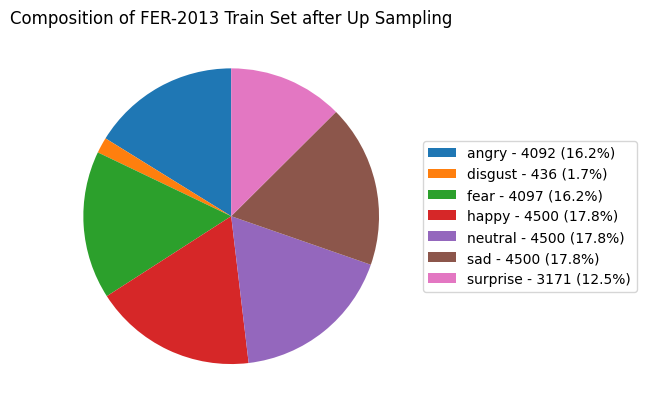

In [120]:
anger = 4500 - 4062
upsampling('JAFFE/extracted/3', 'DownFER/train/angry', anger)
plot_pie('DownFER/train', 'FER-2013 Train Set after Up Sampling')

Up-sampling complete images in  DownFER/train/angry


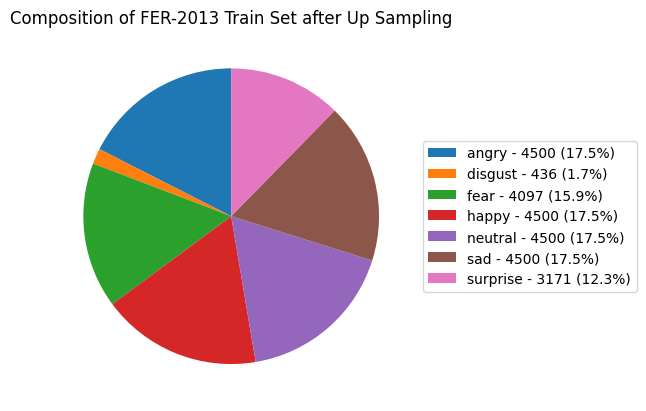

In [121]:
anger = 4500 - 4092
upsampling('Affwild2/aff_train/1', 'DownFER/train/angry', anger)
plot_pie('DownFER/train', 'FER-2013 Train Set after Up Sampling')

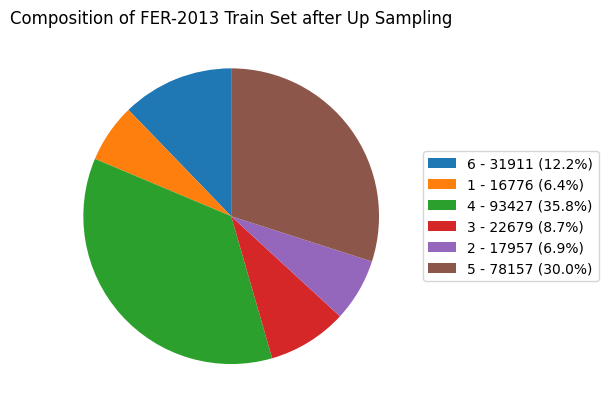

In [124]:
plot_pie('Affwild2/aff_train', 'FER-2013 Train Set after Up Sampling')

In [122]:
list = ['ADFES/extracted/disgust','CK+/extracted/3', 'JAFFE/extracted/4', 'Affwild2/aff_train/2']
for i in list: 
    disgust = 4500 - len([f for f in os.listdir('DownFER/train/disgust') if f != '.DS_Store' ])
    if disgust >0: 
        upsampling(i, 'DownFER/train/disgust', disgust)
    else: break 

Up-sampling complete images in  DownFER/train/disgust
Up-sampling complete images in  DownFER/train/disgust
Up-sampling complete images in  DownFER/train/disgust
Up-sampling complete images in  DownFER/train/disgust


In [131]:
disgust = 4500 - 4496

In [132]:
upsampling('Affwild2/aff_train/2', 'DownFER/train/disgust', disgust)

Up-sampling complete images in  DownFER/train/disgust


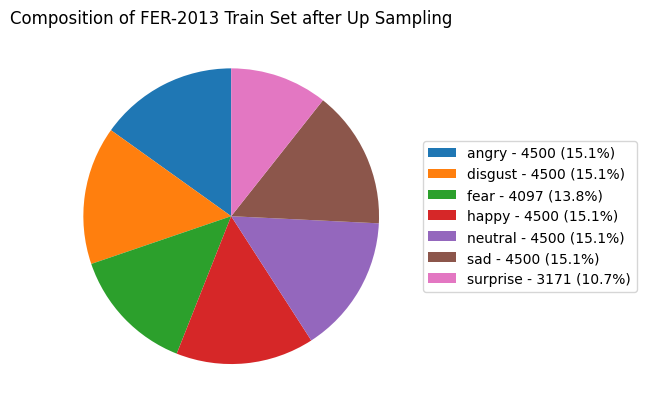

In [133]:
plot_pie('DownFER/train', 'FER-2013 Train Set after Up Sampling')

Up-sampling complete images in  DownFER/train/fear
Up-sampling complete images in  DownFER/train/fear
Up-sampling complete images in  DownFER/train/fear
Up-sampling complete images in  DownFER/train/fear


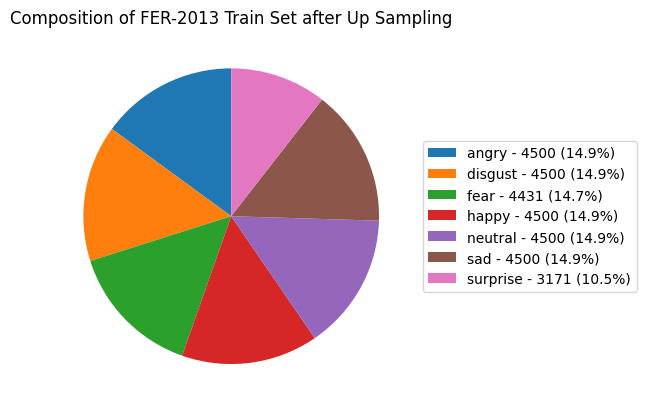

In [134]:
list = ['ADFES/extracted/fear','CK+/extracted/4', 'JAFFE/extracted/5', 'Affwild2/aff_train/3']
for i in list: 
    fear = 4500 - len([f for f in os.listdir('DownFER/train/fear') if f != '.DS_Store' ])
    if fear >0: 
        upsampling(i, 'DownFER/train/fear', fear)
    else: break 
plot_pie('DownFER/train', 'FER-2013 Train Set after Up Sampling')

In [144]:
fear = 4500 - len([f for f in os.listdir('DownFER/train/fear') if f != '.DS_Store' ])
fear

0

In [149]:
upsampling('Affwild2/aff_train/3', 'DownFER/train/fear', 2)

Up-sampling complete images in  DownFER/train/fear


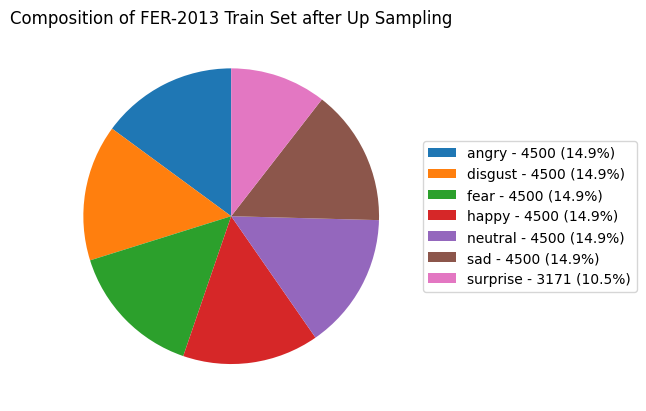

In [150]:
plot_pie('DownFER/train', 'FER-2013 Train Set after Up Sampling')

In [153]:
list = ['ADFES/extracted/surprise','CK+/extracted/7', 'JAFFE/extracted/2', 'Affwild2/aff_train/6']
for i in list: 
    surprise = 4500 - len([f for f in os.listdir('DownFER/train/surprise') if f != '.DS_Store' ])
    if surprise >0: 
        upsampling(i, 'DownFER/train/surprise', surprise)
    else: break 

Up-sampling complete images in  DownFER/train/surprise
Up-sampling complete images in  DownFER/train/surprise
Up-sampling complete images in  DownFER/train/surprise
Up-sampling complete images in  DownFER/train/surprise


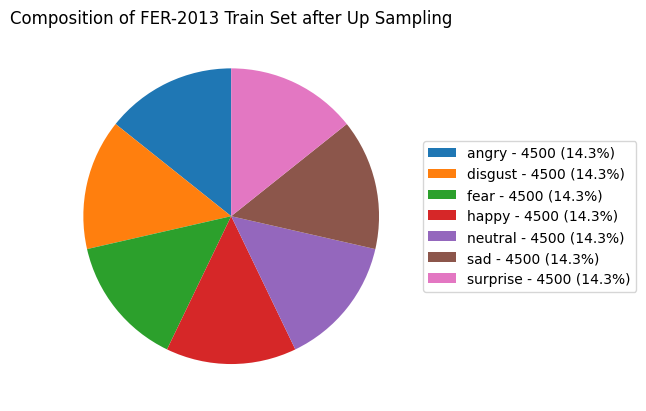

In [166]:
plot_pie('DownFER/train', 'FER-2013 Train Set after Up Sampling')

In [165]:
upsampling('Affwild2/aff_train/6', 'DownFER/train/surprise', 2)

Up-sampling complete images in  DownFER/train/surprise


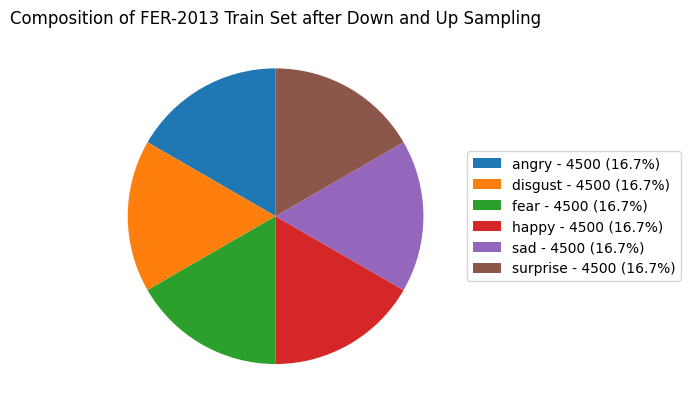

In [174]:
plot_pie('DownFER/train', 'FER-2013 Train Set after Down and Up Sampling', 'composition_pie/fer_after_down.png')

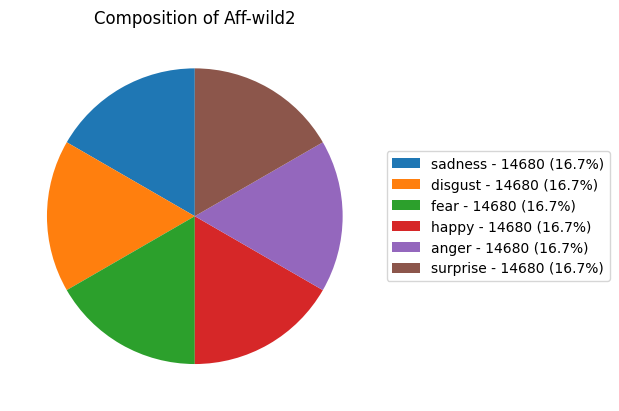

In [172]:
plot_pie('DownAff/aff_train', 'Aff-wild2', 'composition_pie/aff_after_down.png')